In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
tr = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.8786 - loss: 0.4008 - val_accuracy: 0.9837 - val_loss: 0.0537
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9846 - loss: 0.0523 - val_accuracy: 0.9898 - val_loss: 0.0419
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9898 - val_loss: 0.0350
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0.9902 - val_loss: 0.0343
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9910 - val_loss: 0.0338


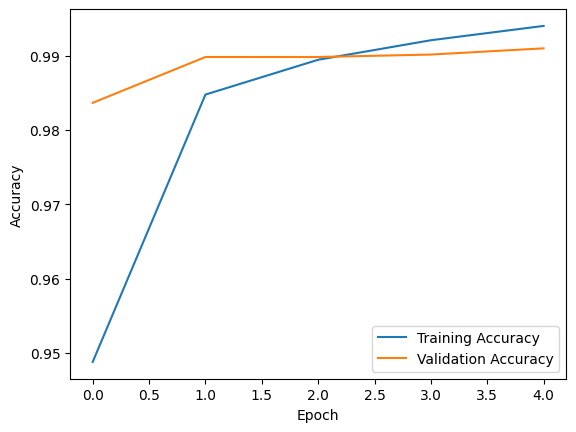

In [ ]:
plt.plot(tr.tr['accuracy'], label='Training Accuracy')
plt.plot(tr.tr['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(x_test)
print(f"Predicted class for first test image: {predictions[0].argmax()}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Predicted class for first test image: 7
